In [1]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises


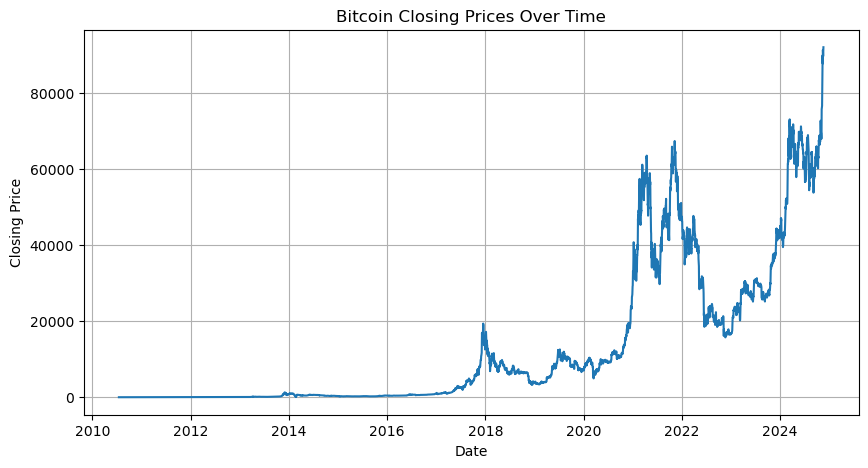

                      date          open          high           low  \
count                 5240   5240.000000   5240.000000   5240.000000   
mean   2017-09-17 12:00:00  13286.521682  13606.123448  12951.583925   
min    2010-07-17 00:00:00      0.049510      0.049510      0.010000   
25%    2014-02-15 18:00:00    235.370000    239.125000    231.292500   
50%    2017-09-17 12:00:00   3608.970000   3689.410000   3548.395000   
75%    2021-04-19 06:00:00  20038.875000  20457.150000  19592.225000   
max    2024-11-19 00:00:00  91235.400000  94015.000000  90298.300000   
std                    NaN  19270.456686  19715.406770  18812.996408   

              close  volume  
count   5240.000000  5240.0  
mean   13304.450149     0.0  
min        0.049510     0.0  
25%      235.395000     0.0  
50%     3612.140000     0.0  
75%    20062.475000     0.0  
max    91941.900000     0.0  
std    19300.594885     0.0  
            open      high       low     close  volume
open    1.000000  0.999632

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# data' directory
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory {data_dir} does not exist.")

# Filter out non-CSV files and initialize the dictionary
currency_files = os.listdir(data_dir)
currency_data = {}

for file in currency_files:
    if file.endswith('.csv'):
        currency_name = file[:-4] 
        try:
            currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Example using Bitcoin data
btc_data = currency_data.get('BTC')
if btc_data is None:
    raise ValueError("BTC data file not found.")

# Validate required columns and add missing ones if needed
required_columns = ['date', 'close', 'open', 'high', 'low', 'volume']
for col in required_columns:
    if col not in btc_data.columns:
        print(f"Warning: Missing column '{col}'. Adding placeholder.")
        btc_data[col] = 0  # Fill with zeros

# Drop rows with missing data
btc_data = btc_data.dropna(subset=['date', 'close'])

# Plotting closing prices
plt.figure(figsize=(10, 5))
plt.plot(btc_data['date'], btc_data['close'])
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Display summary statistics
print(btc_data.describe())

# Correlation matrix
correlation_matrix = btc_data[['open', 'high', 'low', 'close', 'volume']].corr()
print(correlation_matrix)


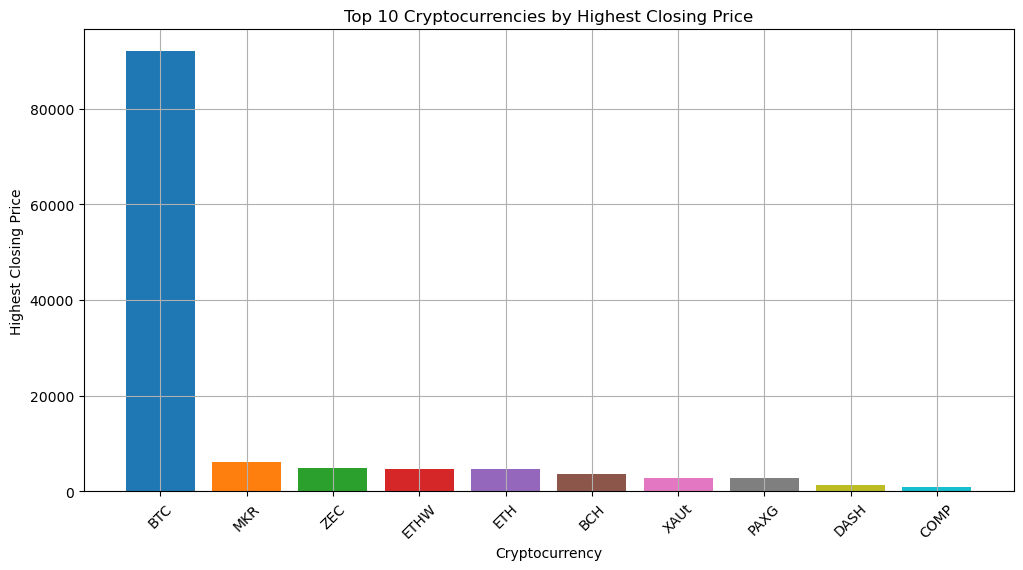

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Find the highest closing price for each currency
highest_closes = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        highest_closes[ticker] = df['close'].max()

# Step 2: Sort by the highest closing price and get top 10
top_10_currencies = sorted(highest_closes.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_currencies = dict(top_10_currencies)

# Step 3: Generate a list of unique colors
num_currencies = len(top_10_currencies)
colors = plt.cm.tab10  # Using 'tab10' colormap for up to 10 colors
color_list = [colors(i) for i in range(num_currencies)]  # Extracting the colors

# Step 4: Plot the top 10 cryptocurrencies by highest closing price with different colors
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_currencies.keys(), top_10_currencies.values(), color=color_list)
plt.title('Top 10 Cryptocurrencies by Highest Closing Price')
plt.xlabel('Cryptocurrency')
plt.ylabel('Highest Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [6]:
# Interactive Daily Price visulization 

import pandas as pd
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

def plot_crypto(data, ticker, visualization_type):
    """Plot the selected cryptocurrency with the given visualization type."""
    if ticker not in data:
        print(f"{ticker} data is not available.")
        return

    df = data[ticker]
    if visualization_type == 'Closing Prices':
        plt.figure(figsize=(10, 5))
        plt.plot(df['date'], df['close'], label='Closing Price')
        plt.title(f'{ticker} Closing Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.legend()
        plt.show()
    elif visualization_type == 'High vs Low':
        plt.figure(figsize=(10, 5))
        plt.plot(df['date'], df['high'], label='High Prices', color='green')
        plt.plot(df['date'], df['low'], label='Low Prices', color='red')
        plt.title(f'{ticker} High and Low Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True)
        plt.legend()
        plt.show()
    elif visualization_type == 'Volume':
        if 'volume' in df.columns:
            plt.figure(figsize=(10, 5))
            plt.bar(df['date'], df['volume'], label='Volume', color='blue', alpha=0.5)
            plt.title(f'{ticker} Volume Over Time')
            plt.xlabel('Date')
            plt.ylabel('Volume')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print(f"{ticker} data does not have 'volume' column.")

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
crypto_data = load_data(data_dir)

# Widgets
tickers = list(crypto_data.keys())
visualization_options = ['Closing Prices', 'High vs Low', 'Volume']

interact(plot_crypto, data=widgets.fixed(crypto_data), 
         ticker=widgets.Dropdown(options=tickers, description='Ticker'),
         visualization_type=widgets.Dropdown(options=visualization_options, description='Visualization'))


interactive(children=(Dropdown(description='Ticker', options=('HBAR', 'IOTA', 'KSM', 'SAND', 'CKB', 'MX', 'CRV…

<function __main__.plot_crypto(data, ticker, visualization_type)>

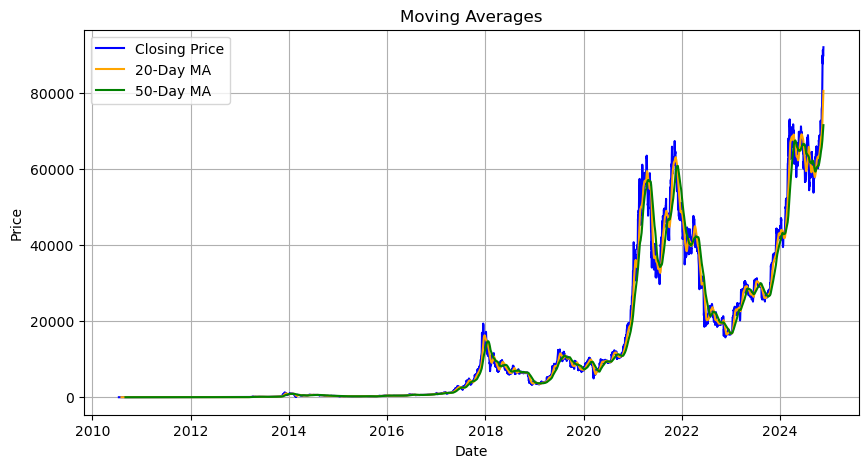

In [14]:
# Moving Average 

btc_data['MA20'] = btc_data['close'].rolling(window=20).mean()
btc_data['MA50'] = btc_data['close'].rolling(window=50).mean()

plt.figure(figsize=(10, 5))
plt.plot(btc_data['date'], btc_data['close'], label='Closing Price', color='blue')
plt.plot(btc_data['date'], btc_data['MA20'], label='20-Day MA', color='orange')
plt.plot(btc_data['date'], btc_data['MA50'], label='50-Day MA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


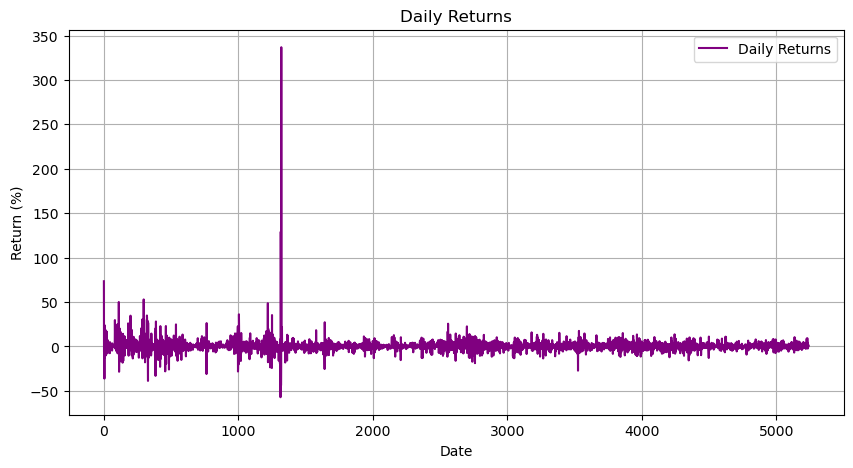

In [13]:
# Daily Returns 
btc_data['daily_return'] = btc_data['close'].pct_change() * 100

plt.figure(figsize=(10, 5))
btc_data['daily_return'].plot(label='Daily Returns', color='purple')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.legend()
plt.show()


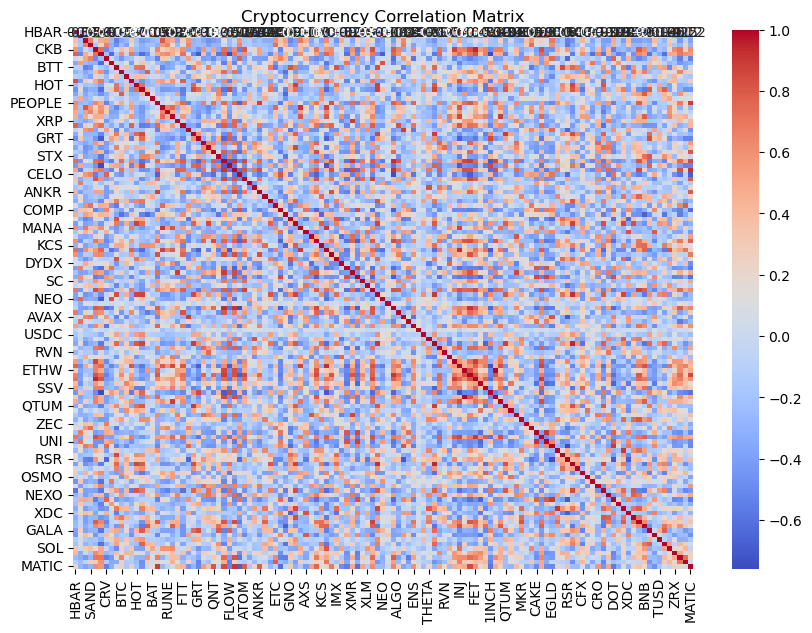

In [17]:
# Heatmap 

price_data = pd.DataFrame({ticker: df['close'] for ticker, df in currency_data.items()})
correlation_matrix = price_data.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cryptocurrency Correlation Matrix')
plt.show()


In [37]:
# Highest Volitility 

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import numpy as np

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Calculate volatility (standard deviation of 'close' prices)
volatility = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        volatility[ticker] = df['close'].std()  # Standard deviation of closing prices

# Step 2: Sort by volatility and get top 10 least volatile currencies
least_volatile_currencies = sorted(volatility.items(), key=lambda x: x[1])[:10]
least_volatile_currencies = dict(least_volatile_currencies)

# Step 3: Generate a list of unique colors
num_currencies = len(least_volatile_currencies)
colors = plt.cm.tab10  # Using 'tab10' colormap for up to 10 colors
color_list = [colors(i) for i in range(num_currencies)]  # Extracting the colors

# Step 4: Define the visualizations

def plot_visualization(visualization_type):
    if visualization_type == 'Horizontal Bar Chart':
        plt.figure(figsize=(12, 6))
        plt.barh(list(least_volatile_currencies.keys()), list(least_volatile_currencies.values()), color=color_list)
        plt.title('Top 10 Least Volatile Cryptocurrencies Based on Closing Price Volatility', fontsize=16, fontweight='bold')
        plt.xlabel('Volatility (Standard Deviation of Closing Prices)', fontsize=14)
        plt.ylabel('Cryptocurrency', fontsize=14)
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Boxplot':
        # Prepare the data for the boxplot
        top_10_tickers = list(least_volatile_currencies.keys())
        top_10_data = [currency_data[ticker]['close'] for ticker in top_10_tickers]

        # Create a DataFrame for plotting
        volatility_df = pd.DataFrame(top_10_data).T
        volatility_df.columns = top_10_tickers

        # Plotting the boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=volatility_df, palette='Set2')
        plt.title('Volatility Distribution of Top 10 Least Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Cryptocurrency', fontsize=14)
        plt.ylabel('Closing Prices', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Scatter Plot (Volatility vs Avg Price)':
        # Calculate the average closing price for each currency
        average_prices = {ticker: currency_data[ticker]['close'].mean() for ticker in least_volatile_currencies.keys()}

        # Plotting the scatter plot for volatility vs. average closing price
        plt.figure(figsize=(12, 6))
        plt.scatter(list(average_prices.values()), list(least_volatile_currencies.values()), color=color_list)
        plt.title('Volatility vs. Average Closing Price for Top 10 Least Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Average Closing Price', fontsize=14)
        plt.ylabel('Volatility (Standard Deviation)', fontsize=14)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Heatmap of Volatility':
        # Create a DataFrame to visualize the volatility as a heatmap
        volatility_df = pd.DataFrame(list(least_volatile_currencies.items()), columns=['Cryptocurrency', 'Volatility'])
        volatility_matrix = np.array(volatility_df['Volatility']).reshape(1, -1)

        # Plotting the heatmap
        plt.figure(figsize=(12, 6))
        sns.heatmap(volatility_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=least_volatile_currencies.keys(), yticklabels=['Volatility'])
        plt.title('Heatmap of Volatility for Top 10 Least Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Cryptocurrency', fontsize=14)
        plt.ylabel('Volatility', fontsize=14)
        plt.tight_layout()
        plt.show()

# Step 5: Use ipywidgets to interact with the visualization
visualization_options = [
    'Horizontal Bar Chart',
    'Boxplot',
    'Scatter Plot (Volatility vs Avg Price)',
    'Heatmap of Volatility'
]

interact(plot_visualization, visualization_type=widgets.Dropdown(options=visualization_options, description='Visualization Type:'))


interactive(children=(Dropdown(description='Visualization Type:', options=('Horizontal Bar Chart', 'Boxplot', …

<function __main__.plot_visualization(visualization_type)>

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import numpy as np

# Load data function
def load_data(data_dir):
    """Load cryptocurrency data into a dictionary."""
    currency_data = {}
    currency_files = os.listdir(data_dir)
    for file in currency_files:
        if file.endswith('.csv'):
            currency_name = file[:-4]
            try:
                currency_data[currency_name] = pd.read_csv(os.path.join(data_dir, file), parse_dates=['date'])
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return currency_data

# Load data
data_dir = '/Users/darioperez/Documents/School/MSDS-570-01 - Fall 2024 Visual & Unstruct Data Analysi/Exercises/bit_project/bit_project/archive/'
currency_data = load_data(data_dir)

# Step 1: Calculate volatility (standard deviation of 'close' prices)
volatility = {}
for ticker, df in currency_data.items():
    if 'close' in df.columns:
        volatility[ticker] = df['close'].std()  # Standard deviation of closing prices

# Step 2: Sort by volatility and get top 10 most volatile currencies
most_volatile_currencies = sorted(volatility.items(), key=lambda x: x[1], reverse=True)[:10]
most_volatile_currencies = dict(most_volatile_currencies)

# Step 3: Generate a list of unique colors
num_currencies = len(most_volatile_currencies)
colors = plt.cm.tab10  # Using 'tab10' colormap for up to 10 colors
color_list = [colors(i) for i in range(num_currencies)]  # Extracting the colors

# Step 4: Define the visualizations for most volatile cryptocurrencies

def plot_visualization(visualization_type):
    if visualization_type == 'Horizontal Bar Chart':
        plt.figure(figsize=(12, 6))
        plt.barh(list(most_volatile_currencies.keys()), list(most_volatile_currencies.values()), color=color_list)
        plt.title('Top 10 Most Volatile Cryptocurrencies Based on Closing Price Volatility', fontsize=16, fontweight='bold')
        plt.xlabel('Volatility (Standard Deviation of Closing Prices)', fontsize=14)
        plt.ylabel('Cryptocurrency', fontsize=14)
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Boxplot':
        # Prepare the data for the boxplot
        top_10_tickers = list(most_volatile_currencies.keys())
        top_10_data = [currency_data[ticker]['close'] for ticker in top_10_tickers]

        # Create a DataFrame for plotting
        volatility_df = pd.DataFrame(top_10_data).T
        volatility_df.columns = most_volatile_currencies.keys()

        # Plotting the boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=volatility_df, palette='Set2')
        plt.title('Volatility Distribution of Top 10 Most Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Cryptocurrency', fontsize=14)
        plt.ylabel('Closing Prices', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Scatter Plot (Volatility vs Avg Price)':
        # Calculate the average closing price for each currency
        average_prices = {ticker: currency_data[ticker]['close'].mean() for ticker in most_volatile_currencies.keys()}

        # Plotting the scatter plot for volatility vs. average closing price
        plt.figure(figsize=(12, 6))
        plt.scatter(list(average_prices.values()), list(most_volatile_currencies.values()), color=color_list)
        plt.title('Volatility vs. Average Closing Price for Top 10 Most Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Average Closing Price', fontsize=14)
        plt.ylabel('Volatility (Standard Deviation)', fontsize=14)
        plt.tight_layout()
        plt.show()

    elif visualization_type == 'Heatmap of Volatility':
        # Create a DataFrame to visualize the volatility as a heatmap
        volatility_df = pd.DataFrame(list(most_volatile_currencies.items()), columns=['Cryptocurrency', 'Volatility'])
        volatility_matrix = np.array(volatility_df['Volatility']).reshape(1, -1)

        # Plotting the heatmap
        plt.figure(figsize=(12, 6))
        sns.heatmap(volatility_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=most_volatile_currencies.keys(), yticklabels=['Volatility'])
        plt.title('Heatmap of Volatility for Top 10 Most Volatile Cryptocurrencies', fontsize=16, fontweight='bold')
        plt.xlabel('Cryptocurrency', fontsize=14)
        plt.ylabel('Volatility', fontsize=14)
        plt.tight_layout()
        plt.show()

# Step 5: Use ipywidgets to interact with the visualization
visualization_options = [
    'Horizontal Bar Chart',
    'Boxplot',
    'Scatter Plot (Volatility vs Avg Price)',
    'Heatmap of Volatility'
]

interact(plot_visualization, visualization_type=widgets.Dropdown(options=visualization_options, description='Visualization Type:'))


interactive(children=(Dropdown(description='Visualization Type:', options=('Horizontal Bar Chart', 'Boxplot', …

<function __main__.plot_visualization(visualization_type)>